In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util

from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# Declare the credentials
cid = 'XXXX'
secret = 'XXXX'
username = 'XXXX'
redirect_uri='http://localhost:8889/Spotify-callback'

In [3]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [4]:
# Fetch the top-50 songs of the user
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range='medium_term')
    for song in range(50):
        list = []
        list.append(results)
        with open('top50_data.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [5]:
# Open the JSON file to Python objects
with open('top50_data.json') as f:
  data = json.load(f)

In [6]:
len(data[0]['items'])

50

In [7]:
list_of_results = data[0]["items"]
list_of_artist_names = []
list_of_artist_uri = []
list_of_song_names = []
list_of_song_uri = []
list_of_durations_ms = []
list_of_explicit = []
list_of_albums = []
list_of_popularity = []

for result in list_of_results:
    result["album"]
    this_artists_name = result["artists"][0]["name"]
    list_of_artist_names.append(this_artists_name)
    this_artists_uri = result["artists"][0]["uri"]
    list_of_artist_uri.append(this_artists_uri)
    list_of_songs = result["name"]
    list_of_song_names.append(list_of_songs)
    song_uri = result["uri"]
    list_of_song_uri.append(song_uri)
    list_of_duration = result["duration_ms"]
    list_of_durations_ms.append(list_of_duration)
    song_explicit = result["explicit"]
    list_of_explicit.append(song_explicit)
    this_album = result["album"]["name"]
    list_of_albums.append(this_album)
    song_popularity = result["popularity"]
    list_of_popularity.append(song_popularity)

In [8]:
# Convert the pulled content to a pandas df
all_songs = pd.DataFrame(
    {'artist': list_of_artist_names,
     'artist_uri': list_of_artist_uri,
     'song': list_of_song_names,
     'song_uri': list_of_song_uri,
     'duration_ms': list_of_durations_ms,
     'explicit': list_of_explicit,
     'album': list_of_albums,
     'popularity': list_of_popularity
     
    })

In [9]:
all_songs.sort_values('popularity', ascending=False)

,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity
15,Tones And I,spotify:artist:2NjfBq1NflQcKSeiDooVjY,Dance Monkey,spotify:track:2XU0oxnq2qxCpomAAuJY8K,209438,False,Dance Monkey (Stripped Back) / Dance Monkey,97
17,John Mayer,spotify:artist:0hEurMDQu99nJRq8pTxO14,Gravity,spotify:track:3SktMqZmo3M9zbB7oKMIF7,245826,False,Continuum,73
1,Neha Kakkar,spotify:artist:5f4QpKfy7ptCHwTqspnSJI,Yaad Piya Ki Aane Lagi,spotify:track:0TkquWzzuxcrwbCWlTrKYF,256678,False,Yaad Piya Ki Aane Lagi,70
6,Yash Narvekar,spotify:artist:4RlnRVxKm3jnUzOP4czbIK,"Muqabla (From ""Street Dancer 3D"")",spotify:track:28veUNu4veN0LOBVa0nFw8,176125,False,"Muqabla (From ""Street Dancer 3D"")",70
0,Pritam,spotify:artist:1wRPtKGflJrBx9BmLsSwlU,"Haan Main Galat (From ""Love Aaj Kal"")",spotify:track:068HSvCf5MbQfhV4qqaelg,218644,False,"Haan Main Galat (From ""Love Aaj Kal"")",69
3,Manu Pilas,spotify:artist:2TJHmhbmT7L3gw2NKyDTHh,Bella Ciao - MÃºsica Original de la Serie la C...,spotify:track:3lWzVNe1yFZlkeBBzUuZYu,139844,False,Bella Ciao (MÃºsica Original de la Serie la Ca...,68
24,One Direction,spotify:artist:4AK6F7OLvEQ5QYCBNiQWHq,Olivia,spotify:track:5dONhl6aXFuN86UBdayF6W,177973,False,Made In The A.M. (Deluxe Edition),68
11,Vayu,spotify:artist:5vwmYR4hN6lASQJUMWPrEL,Naagin,spotify:track:7gAyu0od48mkaCw1laPKVC,157000,False,Naagin,65
37,Vishal,spotify:artist:1xX0K9yaCUHVyVLCVfUAnw,"Dus Bahane 2.0 (From ""Baaghi 3"") (feat. K.K., ...",spotify:track:0z9lOAVgQT5bysEKZ6Wwbk,201655,False,"Dus Bahane 2.0 (From ""Baaghi 3"") (feat. K.K., ...",64
28,Ritviz,spotify:artist:72beYOeW2sb2yfcS4JsRvb,Sage,spotify:track:64RkEV5b7bG697vhIPMlrl,230204,False,Sage,63


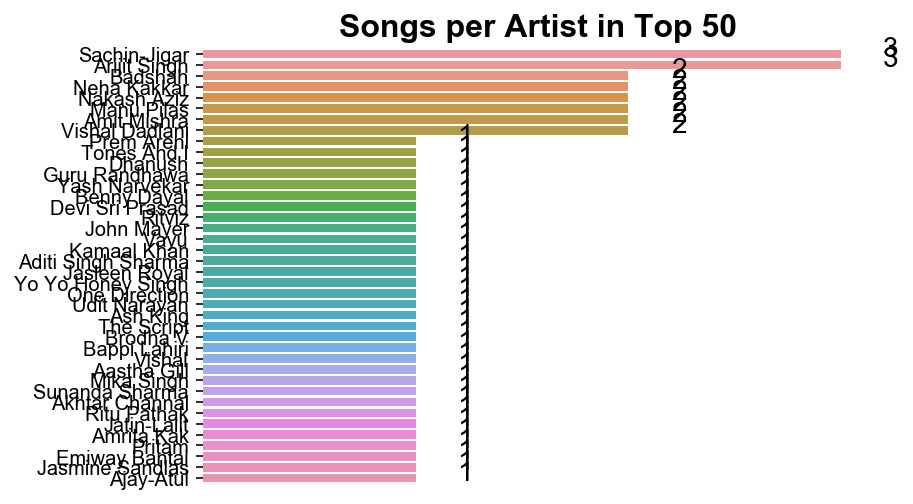

In [10]:
descending_order = all_songs['artist'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(y = all_songs['artist'], order=descending_order)

sns.despine(fig=None, ax=None, top=True, right=True, left=False, trim=False)
sns.set(rc={'figure.figsize':(14,17)})

ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Songs per Artist in Top 50', fontsize=16, fontweight='heavy')
sns.set(font_scale = 1.4)
ax.axes.get_xaxis().set_visible(False)
ax.set_frame_on(False)

y = all_songs['artist'].value_counts()
for i, v in enumerate(y):
    ax.text(v + 0.2, i + .16, str(v), color='black', fontweight='light', fontsize=14)
    
plt.show()

In [11]:
# Fetch the user's playlists
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists(username)
for playlist in playlists['items']:
    print('Name: {}, Playlist ID: {}, No Tracks: {}'.
          format(playlist['name'], playlist['id'], playlist['tracks']['total']))

Name: DJ, Playlist ID: 4qmWD04QjpU27lB4b0pb3Q, No Tracks: 94
Name: Bollywood Remix, Playlist ID: 7syrim9K1FCfT1EZWfMUxp, No Tracks: 8


In [12]:
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [13]:
fetch_playlists(sp,username)

,id,name,#tracks
0,4qmWD04QjpU27lB4b0pb3Q,DJ,94
1,7syrim9K1FCfT1EZWfMUxp,Bollywood Remix,8


In [14]:
def fetch_playlist_tracks(sp, username, playlist_id):
    """
    Returns the tracks for the given playlist.
    """
        
    offset = 0
    tracks = []
    
    # Make the API request
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, limit=100, offset=offset, market=None)
        tracks += content['items']
        
        if content['next'] is not None:
            offset += 100
        else:
            break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
    # Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [15]:
fetch_playlist_tracks(sp, username, '4qmWD04QjpU27lB4b0pb3Q')

,track_id,track_name
0,2Ggpu9s4UP2fO7bjgBMiss,Dhinka Chika
1,2zZTXtLqCsICzEcztKjn47,"Tum Hi Ho Bandhu (From ""Cocktail"")"
2,1vSXwYeKnzsVvekSpqVabx,Chikni Chameli
3,3fPgIknlkDWXs1l2noKZbp,Kar Gayi Chull
4,790uNrqzKWCvj8rR1QXNpU,"Aankh Marey (From ""Simmba"")"
...,...,...
89,55wV0bZrwCnJTxgrv6VpVd,Mera Wala Dance
90,068HSvCf5MbQfhV4qqaelg,"Haan Main Galat (From ""Love Aaj Kal"")"
91,0TkquWzzuxcrwbCWlTrKYF,Yaad Piya Ki Aane Lagi
92,31d3tVd82tx2sjA2VQ3PMZ,Lagdi Lahore Di


In [16]:
def fetch_audio_features(sp, username, playlist_id):
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence'],
                              features['speechiness'], features['instrumentalness'],
                              features['liveness'], features['acousticness']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence',
                                                             'speechiness', 'instrumentalness',
                                                             'liveness', 'acousticness'])
    
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
        
    return df_playlist_audio_features

In [19]:
df = fetch_audio_features(sp, username, '4qmWD04QjpU27lB4b0pb3Q')
display(df.shape)
df.head(10)

(94, 10)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
2Ggpu9s4UP2fO7bjgBMiss,Dhinka Chika,0.752,0.978,82.988,-4.786,0.804,0.2300,0.000000,0.3200,0.51800
2zZTXtLqCsICzEcztKjn47,"Tum Hi Ho Bandhu (From ""Cocktail"")",0.714,0.892,134.997,-5.342,0.899,0.0516,0.000817,0.0462,0.00145
1vSXwYeKnzsVvekSpqVabx,Chikni Chameli,0.693,0.956,90.005,-5.012,0.665,0.0710,0.000000,0.2940,0.28900
3fPgIknlkDWXs1l2noKZbp,Kar Gayi Chull,0.827,0.737,121.990,-5.473,0.873,0.0764,0.000322,0.2110,0.03160
790uNrqzKWCvj8rR1QXNpU,"Aankh Marey (From ""Simmba"")",0.796,0.978,129.999,-1.266,0.800,0.0955,0.002540,0.3460,0.28900
5cjVsWqIkBQC7acTRhL0RO,Kamariya,0.825,0.666,96.987,-4.847,0.763,0.0554,0.000003,0.2370,0.14300
2mwBSO58y92EYmEFpDfmS7,Suit Suit,0.767,0.869,98.208,-3.381,0.751,0.0908,0.000000,0.2210,0.14000
0LZA36VEmc6n0Y7X29zIgE,Jaani Tera Naa,0.776,0.882,93.990,-2.864,0.789,0.0456,0.000151,0.1100,0.06530
6cARnc9YVlBNigjNSX63pp,"Dilbar (From ""Satyameva Jayate"")",0.725,0.912,104.054,-3.665,0.674,0.0851,0.000077,0.1070,0.15500


In [20]:
df1 = fetch_audio_features(sp, username, '4qmWD04QjpU27lB4b0pb3Q')
display(df1.shape)
df1.head(3)

(94, 10)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
2Ggpu9s4UP2fO7bjgBMiss,Dhinka Chika,0.752,0.978,82.988,-4.786,0.804,0.2300,0.000000,0.3200,0.51800
2zZTXtLqCsICzEcztKjn47,"Tum Hi Ho Bandhu (From ""Cocktail"")",0.714,0.892,134.997,-5.342,0.899,0.0516,0.000817,0.0462,0.00145
1vSXwYeKnzsVvekSpqVabx,Chikni Chameli,0.693,0.956,90.005,-5.012,0.665,0.0710,0.000000,0.2940,0.28900


In [21]:
for feature in df1.columns:
    if feature == 'tempo' or feature == 'loudness':
        continue
    df1[feature] = df1[feature] * 100

In [22]:
df1.head(3)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
2Ggpu9s4UP2fO7bjgBMiss,Dhinka ChikaDhinka ChikaDhinka ChikaDhinka Chi...,75.2,97.8,82.988,-4.786,80.4,23.00,0.0000,32.00,51.800
2zZTXtLqCsICzEcztKjn47,"Tum Hi Ho Bandhu (From ""Cocktail"")Tum Hi Ho Ba...",71.4,89.2,134.997,-5.342,89.9,5.16,0.0817,4.62,0.145
1vSXwYeKnzsVvekSpqVabx,Chikni ChameliChikni ChameliChikni ChameliChik...,69.3,95.6,90.005,-5.012,66.5,7.10,0.0000,29.40,28.900


In [23]:
def fetch_audio_features(sp, username, playlist_id):
    """
    Returns the selected audio features of every track, 
    for the given playlist.
    """
    
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Append the audio features in a list
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence'])

    # Set the 'tempo' & 'loudness' in the same range with the rest features
    for feature in df_audio_features.columns:
        if feature == 'tempo' or feature == 'loudness':
            continue
        df_audio_features[feature] = df_audio_features[feature] * 100
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
    
    return df_playlist_audio_features

In [24]:
df2 = fetch_audio_features(sp, username, '4qmWD04QjpU27lB4b0pb3Q')
df2.head(3)

,track_name,danceability,energy,tempo,loudness,valence
track_id,,,,,,
2Ggpu9s4UP2fO7bjgBMiss,Dhinka Chika,75.2,97.8,82.988,-4.786,80.4
2zZTXtLqCsICzEcztKjn47,"Tum Hi Ho Bandhu (From ""Cocktail"")",71.4,89.2,134.997,-5.342,89.9
1vSXwYeKnzsVvekSpqVabx,Chikni Chameli,69.3,95.6,90.005,-5.012,66.5


In [25]:
playlists = fetch_playlists(sp,username)
playlists = playlists[:4].copy()
playlists

,id,name,#tracks
0,4qmWD04QjpU27lB4b0pb3Q,DJ,94
1,7syrim9K1FCfT1EZWfMUxp,Bollywood Remix,8


In [31]:
df_party = fetch_audio_features(sp, username, '4qmWD04QjpU27lB4b0pb3Q')
df_remix = fetch_audio_features(sp, username, '7syrim9K1FCfT1EZWfMUxp')
df_lounge = fetch_audio_features(sp, username, '6Jbi3Y7ZNNgSrPaZF4DpUp')
df_pop = fetch_audio_features(sp, username, '3u2nUYNuI08yUg877JE5FI')

In [32]:
df_remix.head().iloc[:, 1:]

,danceability,energy,tempo,loudness,valence
track_id,,,,,
2a9PwTPqO7aTCUlniCic1X,71.0,95.3,131.997,-2.719,51.1
2q12vH6qEvg8y1XBCgTbHZ,82.3,76.3,99.955,-1.695,72.6
0VhKdIMXZ3INkyDoIyPy5l,70.4,93.3,119.984,-4.165,59.5
1NxlktIRgiAPJ8U06v9veI,83.3,74.0,103.035,-4.513,80.4
7heMX7gyHP0mhTlNgd7Lxd,72.1,65.0,130.491,-6.950,39.1


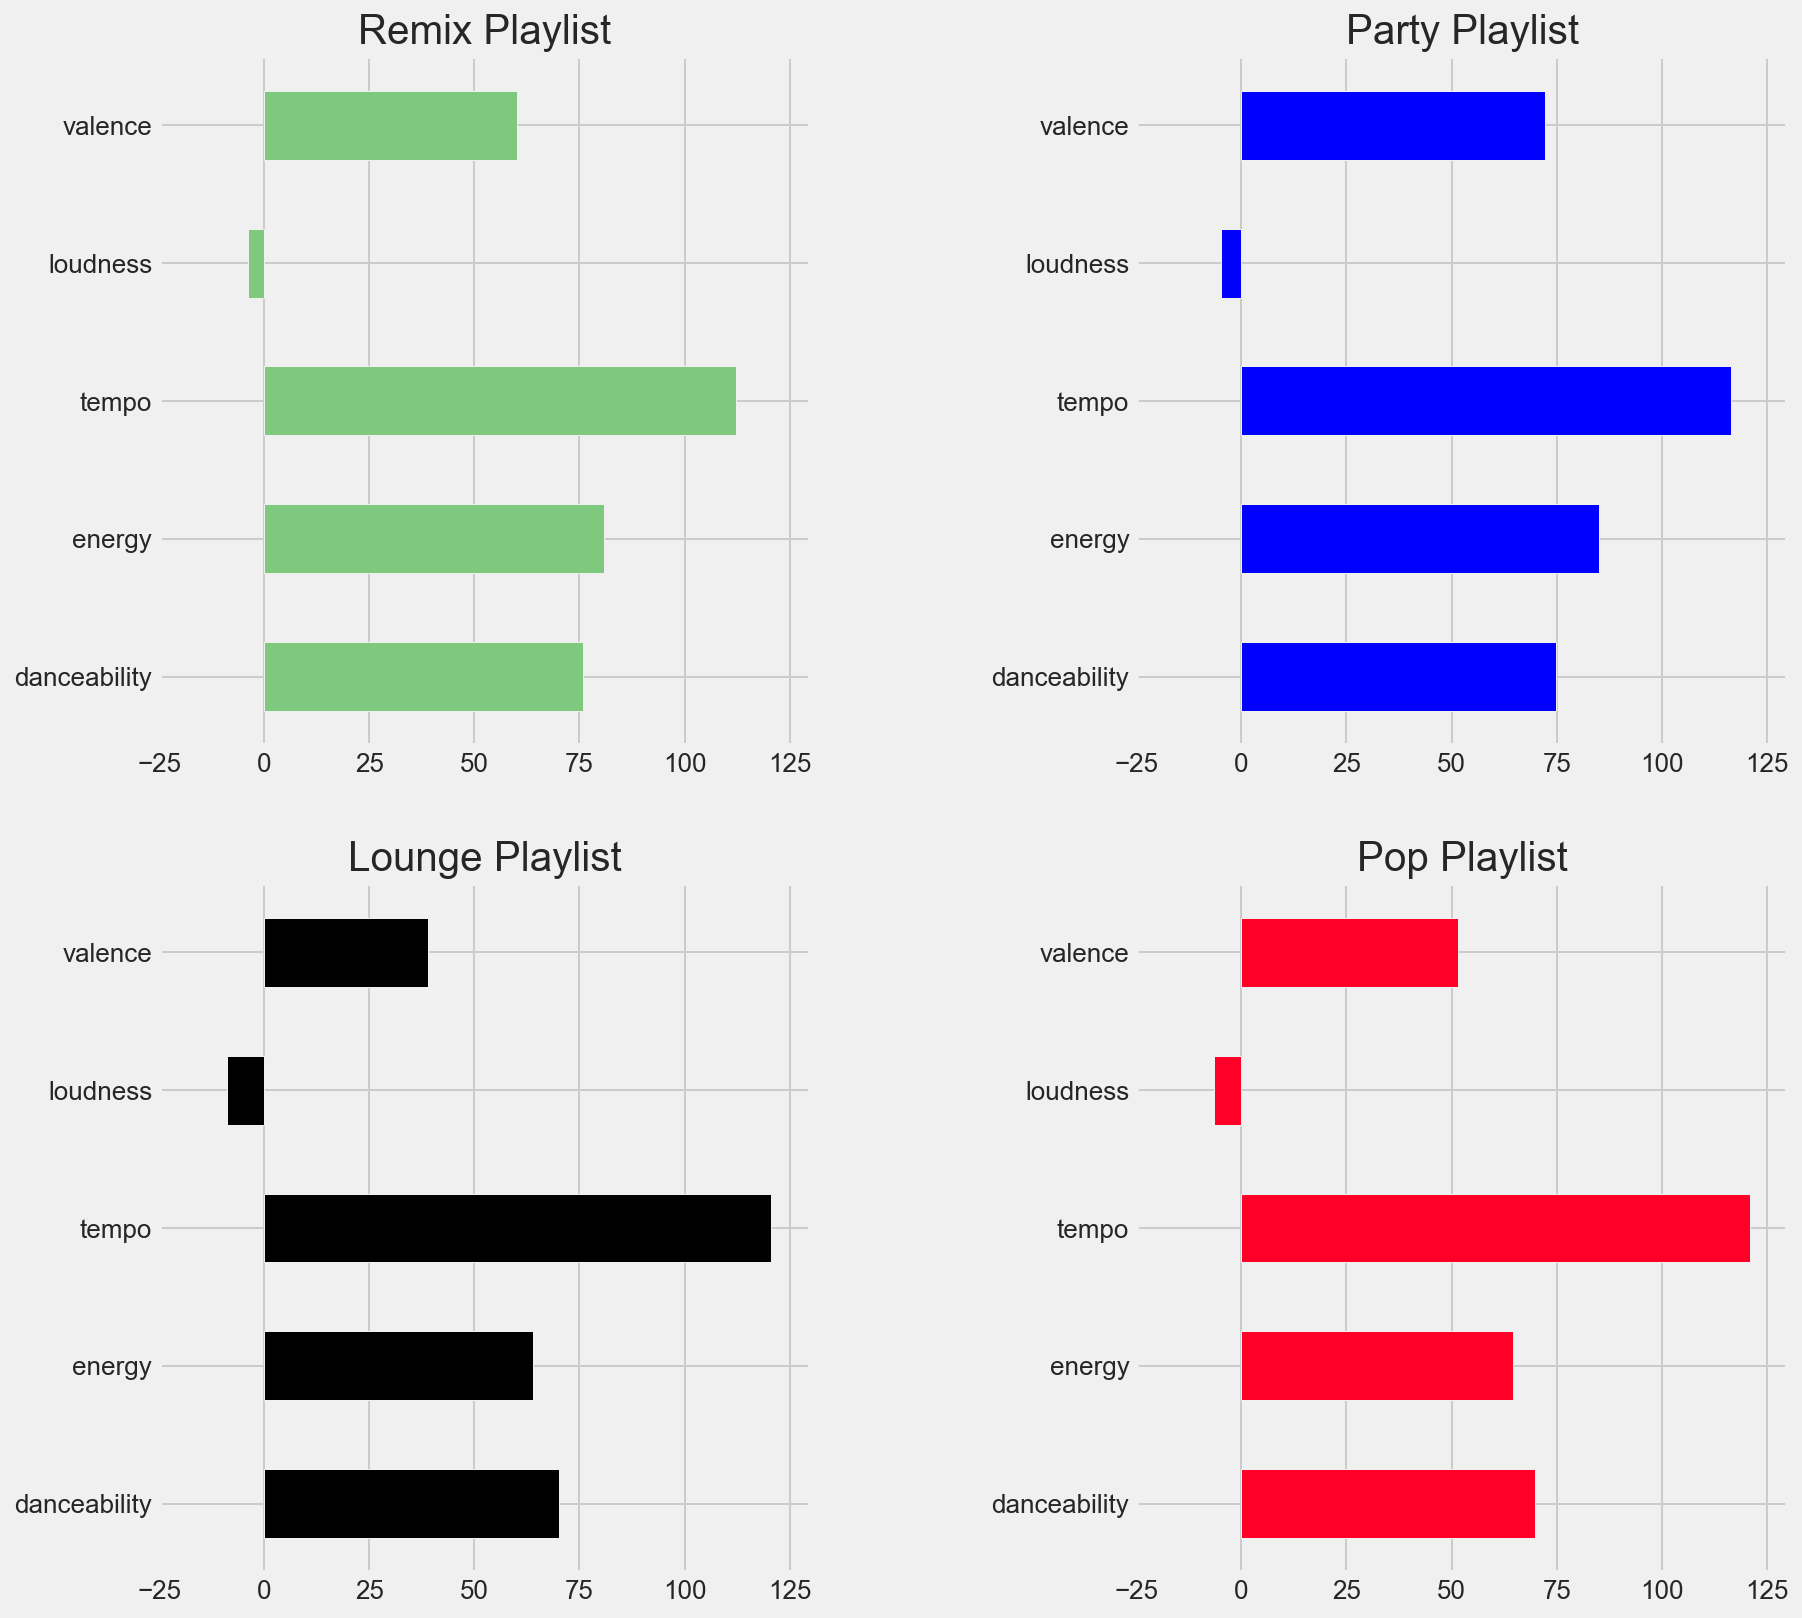

In [33]:
# Create a figure
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.2, wspace=.5)

# top left
df_remix.mean().plot.barh(ax=ax1, colormap=plt.cm.Accent, fontsize=13)
ax1.set_xlim(-25,130)

# top right
df_party.mean().plot.barh(ax=ax2, colormap='winter', fontsize=13)
ax2.set_xlim(-25,130)

# bottom left
df_lounge.mean().plot.barh(ax=ax3, colormap='cubehelix', fontsize=13)
ax3.set_xlim(-25,130)

# bottom right
df_pop.mean().plot.barh(ax=ax4, colormap='gist_rainbow', fontsize=13)
ax4.set_xlim(-25,130)

# Create axis titles
ax1.set_title('Remix Playlist')
ax2.set_title('Party Playlist')
ax3.set_title('Lounge Playlist')
ax4.set_title('Pop Playlist')

plt.show()

In [34]:
display(df_party.mean())
display(df_party.shape)
display(df_pop.mean())
df_pop.shape

danceability     74.889362
energy           85.021277
tempo           116.570968
loudness         -4.944213
valence          72.219149
dtype: float64

(94, 6)

danceability     69.746535
energy           64.533663
tempo           121.015535
loudness         -6.436386
valence          51.571980
dtype: float64

(101, 6)

In [35]:
party_mean = pd.DataFrame(df_party.mean(), columns= ['party_playlist'])
pop_mean = pd.DataFrame(df_pop.mean(), columns= ['pop_playlist'])

In [36]:
party_pop_mean = pd.concat([party_mean, pop_mean], axis=1)
party_pop_mean

,party_playlist,pop_playlist
danceability,74.889362,69.746535
energy,85.021277,64.533663
tempo,116.570968,121.015535
loudness,-4.944213,-6.436386
valence,72.219149,51.571980


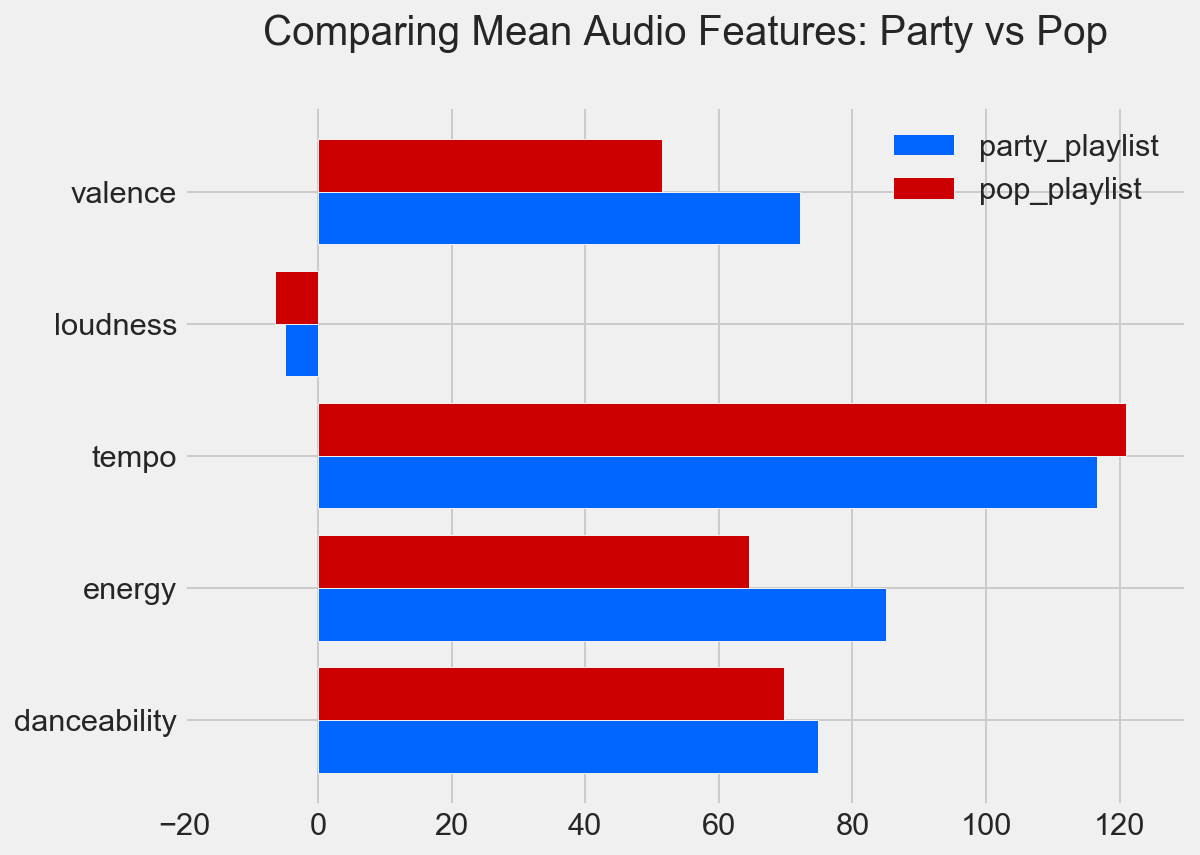

In [37]:
plt.style.use('fivethirtyeight')

party_pop_mean.plot.barh(color = ['#0066FF', '#CC0000'],  width = .8, rot = 0, figsize = (8,6))
plt.title('Comparing Mean Audio Features: Party vs Pop', y = 1.07)
plt.xlim(-20,130) # because ratings start at 0 and end at 5
plt.legend(framealpha = 0, loc = 'upper right')
plt.show()

In [38]:
df_party.describe()

,danceability,energy,tempo,loudness,valence
count,94.000000,94.000000,94.000000,94.000000,94.000000
mean,74.889362,85.021277,116.570968,-4.944213,72.219149
std,9.487076,9.803443,21.016205,2.108380,16.414767
min,47.700000,57.900000,67.508000,-14.913000,26.600000
25%,70.050000,78.125000,103.274250,-5.806750,63.125000
50%,75.950000,87.950000,110.993500,-4.819500,74.550000
75%,81.800000,92.500000,130.788000,-3.758250,86.075000
max,95.200000,99.400000,187.576000,-0.155000,97.200000


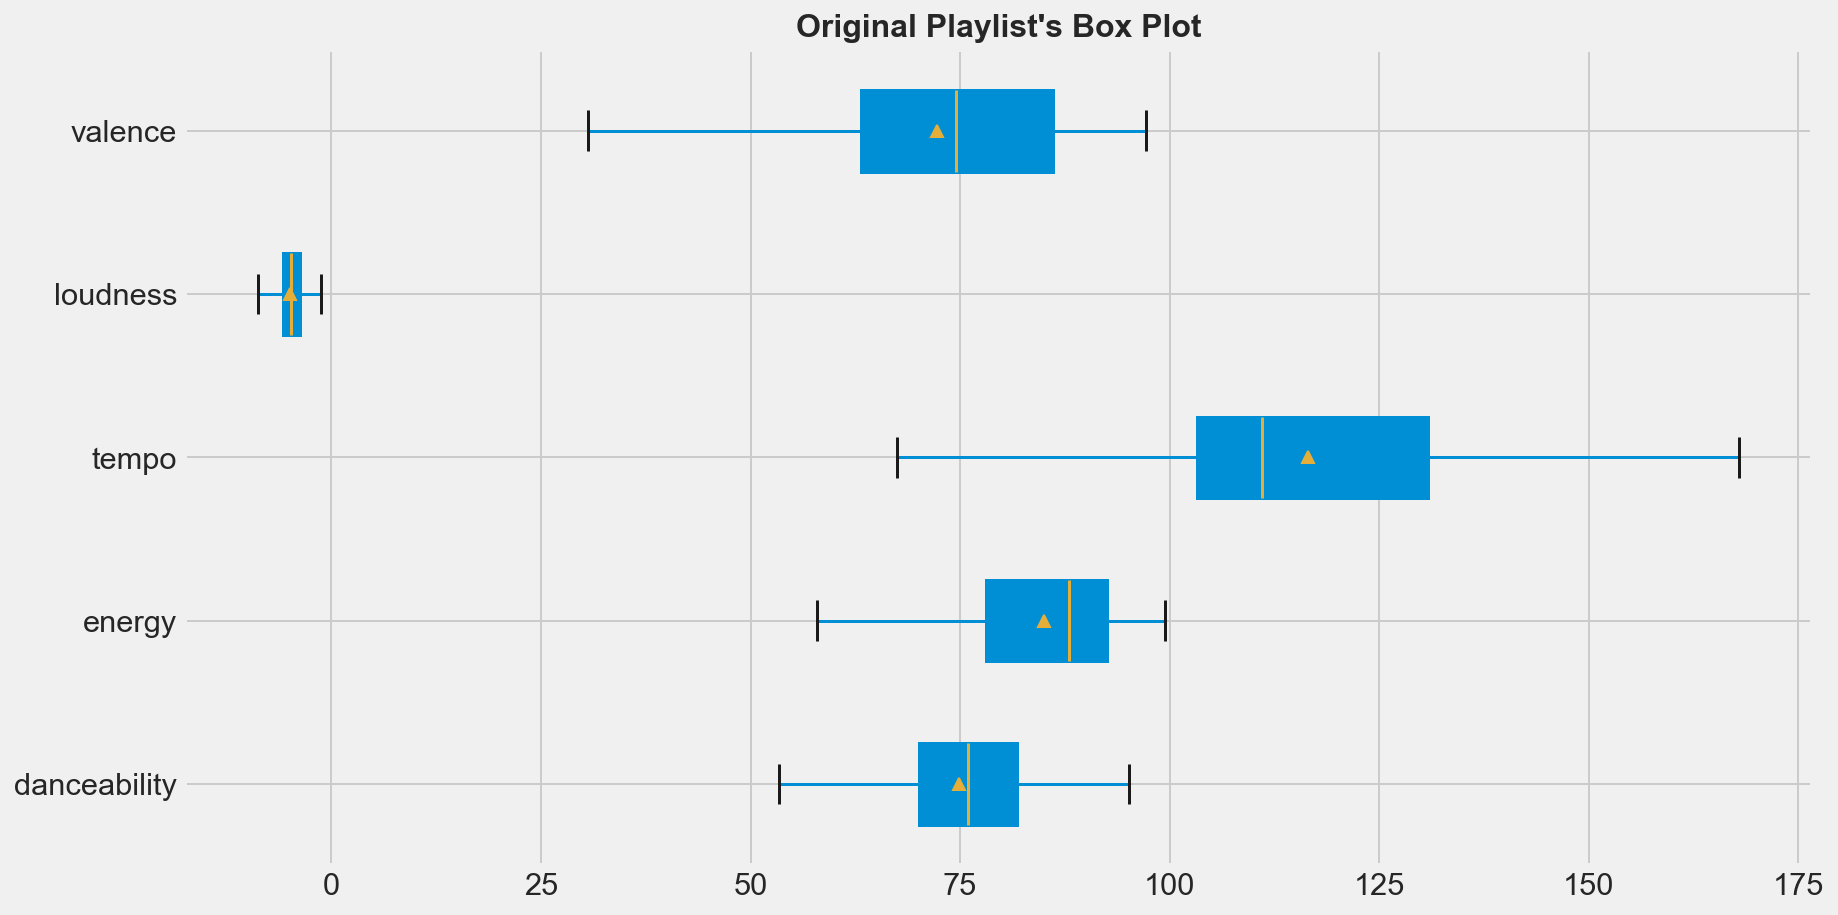

In [39]:
df_party.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Original Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

In [40]:
df_pop_sample_I = df_pop.sample(n=40, weights='danceability', random_state=1)
df_pop_sample_I.describe()

,danceability,energy,tempo,loudness,valence
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,71.607500,64.300000,120.967150,-6.289150,49.350000
std,12.600517,15.261213,28.093489,1.996277,21.021967
min,37.600000,36.500000,77.599000,-11.144000,12.900000
25%,63.150000,55.150000,102.518500,-7.507000,33.500000
50%,74.250000,64.350000,118.505000,-6.005000,48.000000
75%,81.025000,76.425000,140.743500,-5.013500,64.750000
max,88.200000,93.000000,199.827000,-1.475000,95.300000


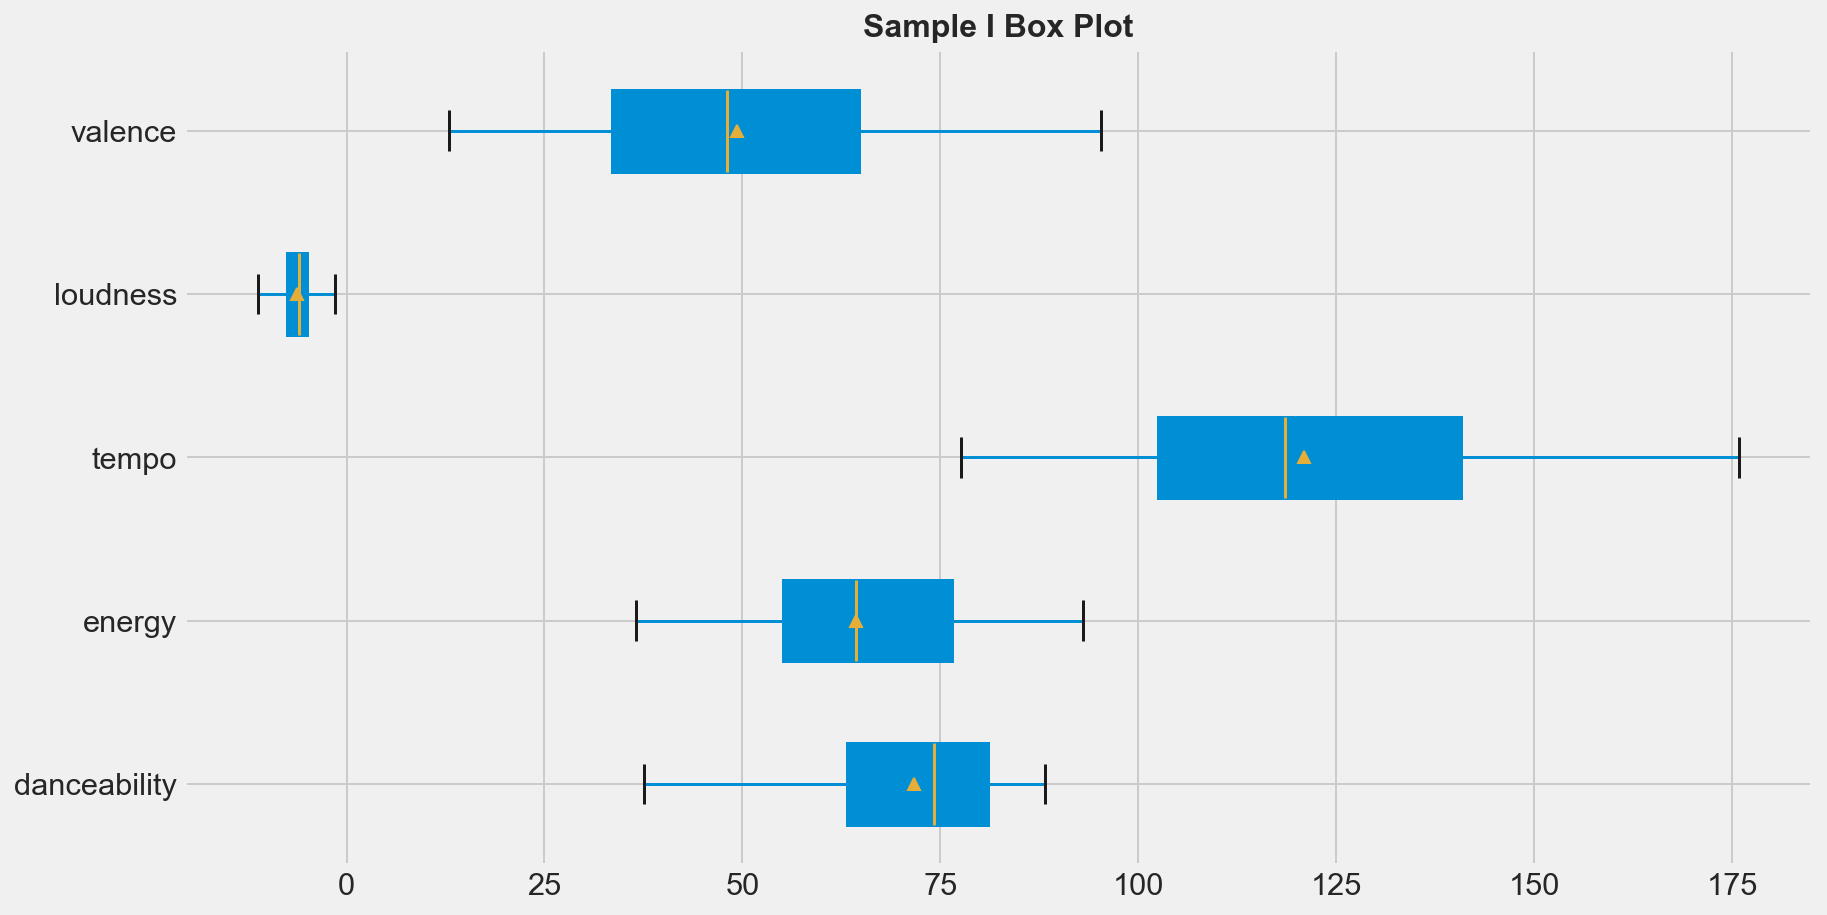

In [41]:
df_pop_sample_I.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Sample I Box Plot", fontsize=16, fontweight='heavy')
plt.show()

In [42]:
df_party_exp_I = pd.concat([df_party, df_pop_sample_I])
display(df_party.describe())
df_party_exp_I.describe()

,danceability,energy,tempo,loudness,valence
count,94.000000,94.000000,94.000000,94.000000,94.000000
mean,74.889362,85.021277,116.570968,-4.944213,72.219149
std,9.487076,9.803443,21.016205,2.108380,16.414767
min,47.700000,57.900000,67.508000,-14.913000,26.600000
25%,70.050000,78.125000,103.274250,-5.806750,63.125000
50%,75.950000,87.950000,110.993500,-4.819500,74.550000
75%,81.800000,92.500000,130.788000,-3.758250,86.075000
max,95.200000,99.400000,187.576000,-0.155000,97.200000


,danceability,energy,tempo,loudness,valence
count,134.000000,134.000000,134.000000,134.000000,134.000000
mean,73.909701,78.835821,117.883261,-5.345687,65.392537
std,10.571915,15.036124,23.331403,2.158365,20.696248
min,37.600000,36.500000,67.508000,-14.913000,12.900000
25%,69.050000,70.000000,103.274250,-6.538000,50.375000
50%,75.450000,82.200000,113.036500,-5.119500,68.500000
75%,81.775000,91.125000,131.986750,-4.119250,80.400000
max,95.200000,99.400000,199.827000,-0.155000,97.200000


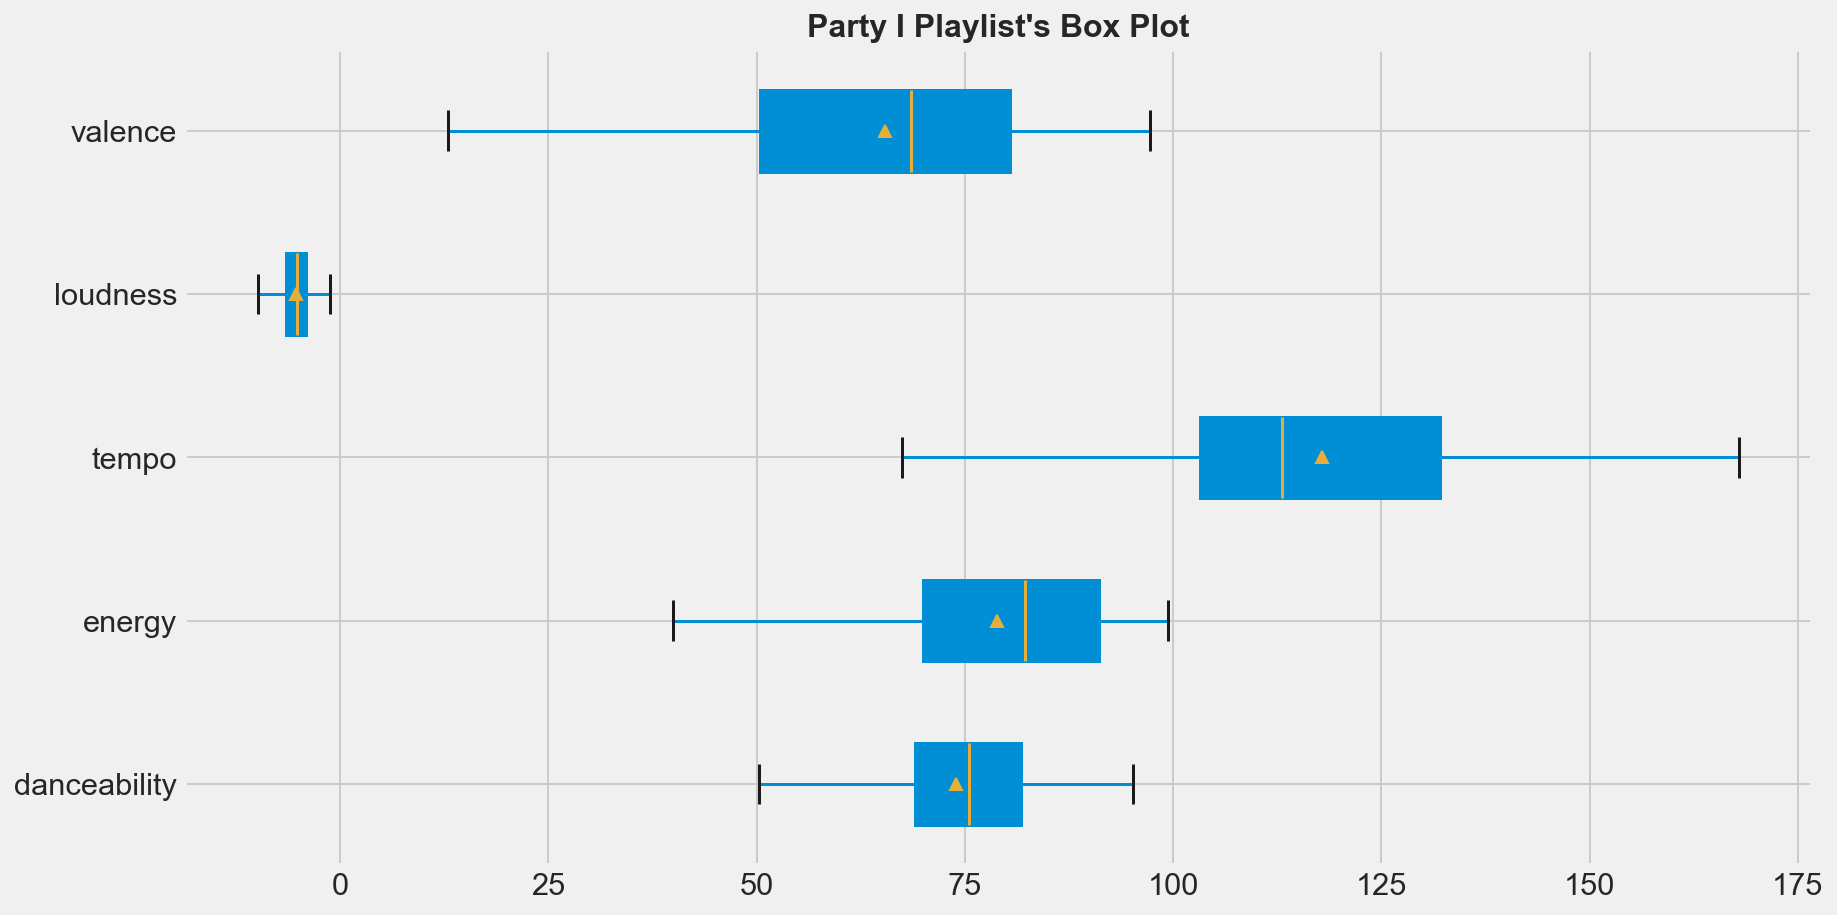

In [43]:
df_party_exp_I.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Party I Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

Approach II

In [44]:
df_pop_sample_II = df_pop[(df_pop['danceability'] > 69.55) & (df_pop['valence'] > 51.89)].copy()

In [45]:
df_pop_sample_II.describe()

,danceability,energy,tempo,loudness,valence
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,79.250000,65.411111,129.683583,-6.206639,70.702778
std,5.578249,12.426418,29.613113,1.664145,12.020542
min,69.600000,27.800000,92.101000,-10.745000,52.000000
25%,75.600000,58.900000,102.492250,-7.085250,59.825000
50%,78.800000,65.850000,123.452000,-6.283000,69.500000
75%,82.950000,74.125000,151.526750,-5.626750,78.075000
max,90.400000,89.100000,183.847000,-1.475000,96.200000


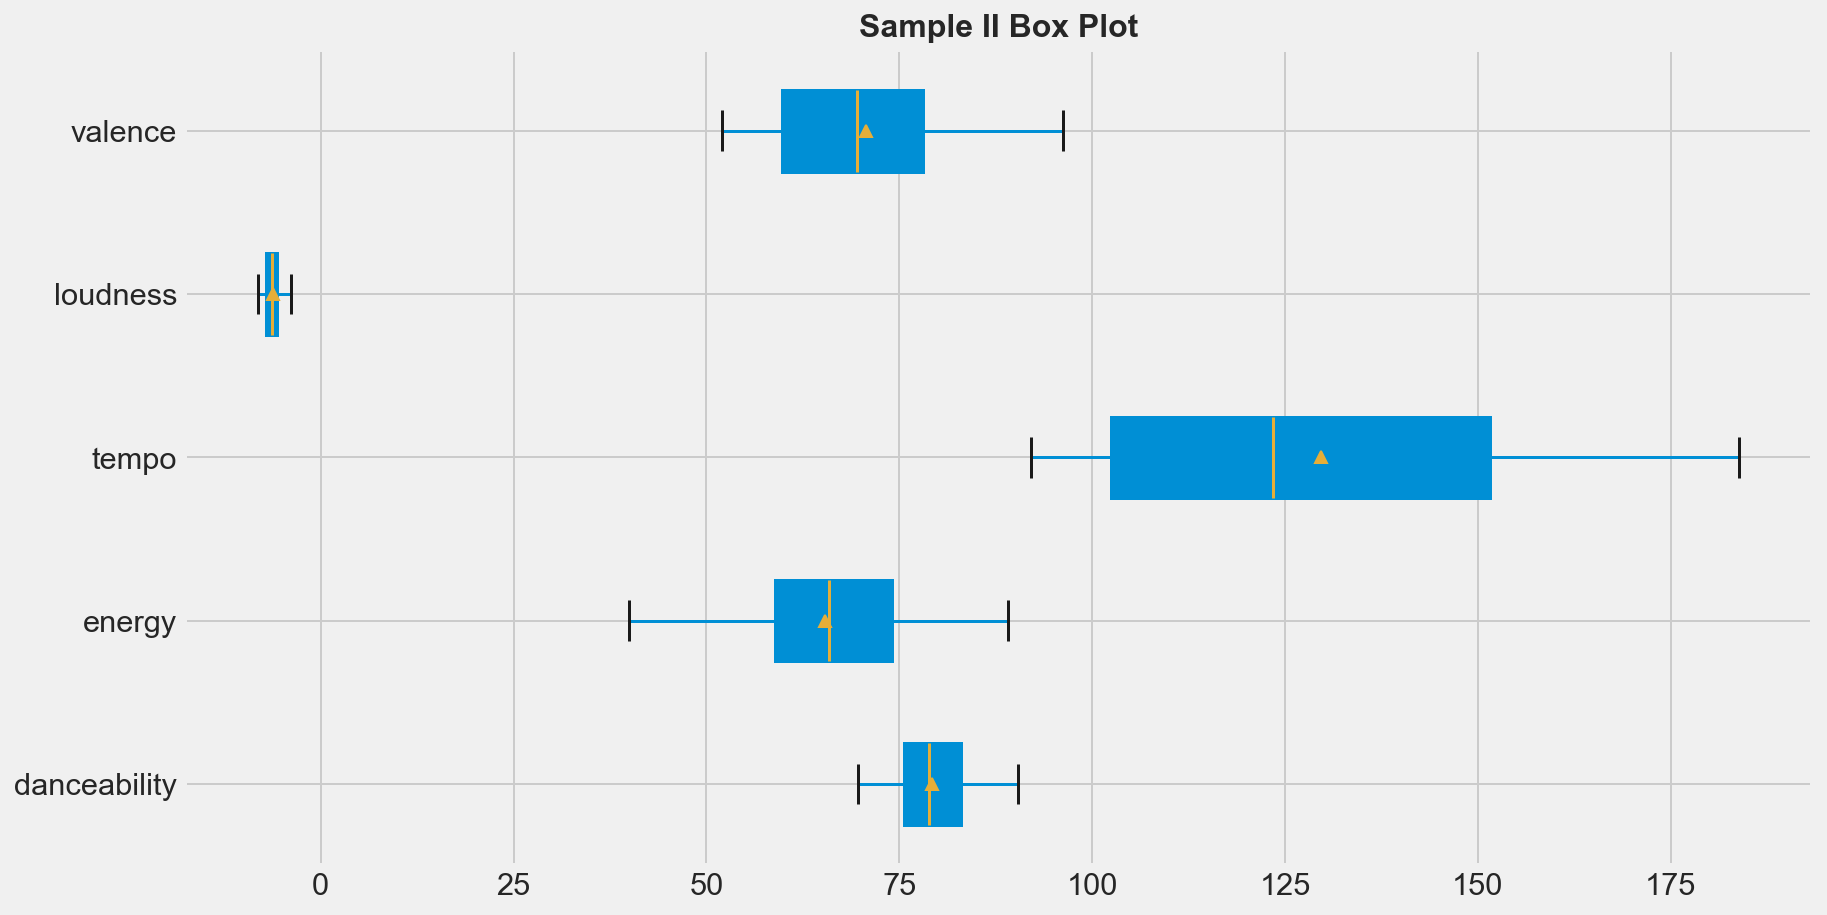

In [46]:
df_pop_sample_II.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Sample II Box Plot", fontsize=16, fontweight='heavy')
plt.show()

In [47]:
df_party_exp_II = pd.concat([df_party, df_pop_sample_II])
display(df_party.describe())
df_party_exp_II.describe()

,danceability,energy,tempo,loudness,valence
count,94.000000,94.000000,94.000000,94.000000,94.000000
mean,74.889362,85.021277,116.570968,-4.944213,72.219149
std,9.487076,9.803443,21.016205,2.108380,16.414767
min,47.700000,57.900000,67.508000,-14.913000,26.600000
25%,70.050000,78.125000,103.274250,-5.806750,63.125000
50%,75.950000,87.950000,110.993500,-4.819500,74.550000
75%,81.800000,92.500000,130.788000,-3.758250,86.075000
max,95.200000,99.400000,187.576000,-0.155000,97.200000


,danceability,energy,tempo,loudness,valence
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,76.096923,79.590769,120.202154,-5.293808,71.799231
std,8.784455,13.739805,24.311423,2.068261,15.294390
min,47.700000,27.800000,67.508000,-14.913000,26.600000
25%,72.100000,70.525000,102.998250,-6.400000,60.700000
50%,77.000000,82.200000,115.966000,-5.221000,73.850000
75%,82.375000,91.125000,132.029250,-4.145250,83.550000
max,95.200000,99.400000,187.576000,-0.155000,97.200000


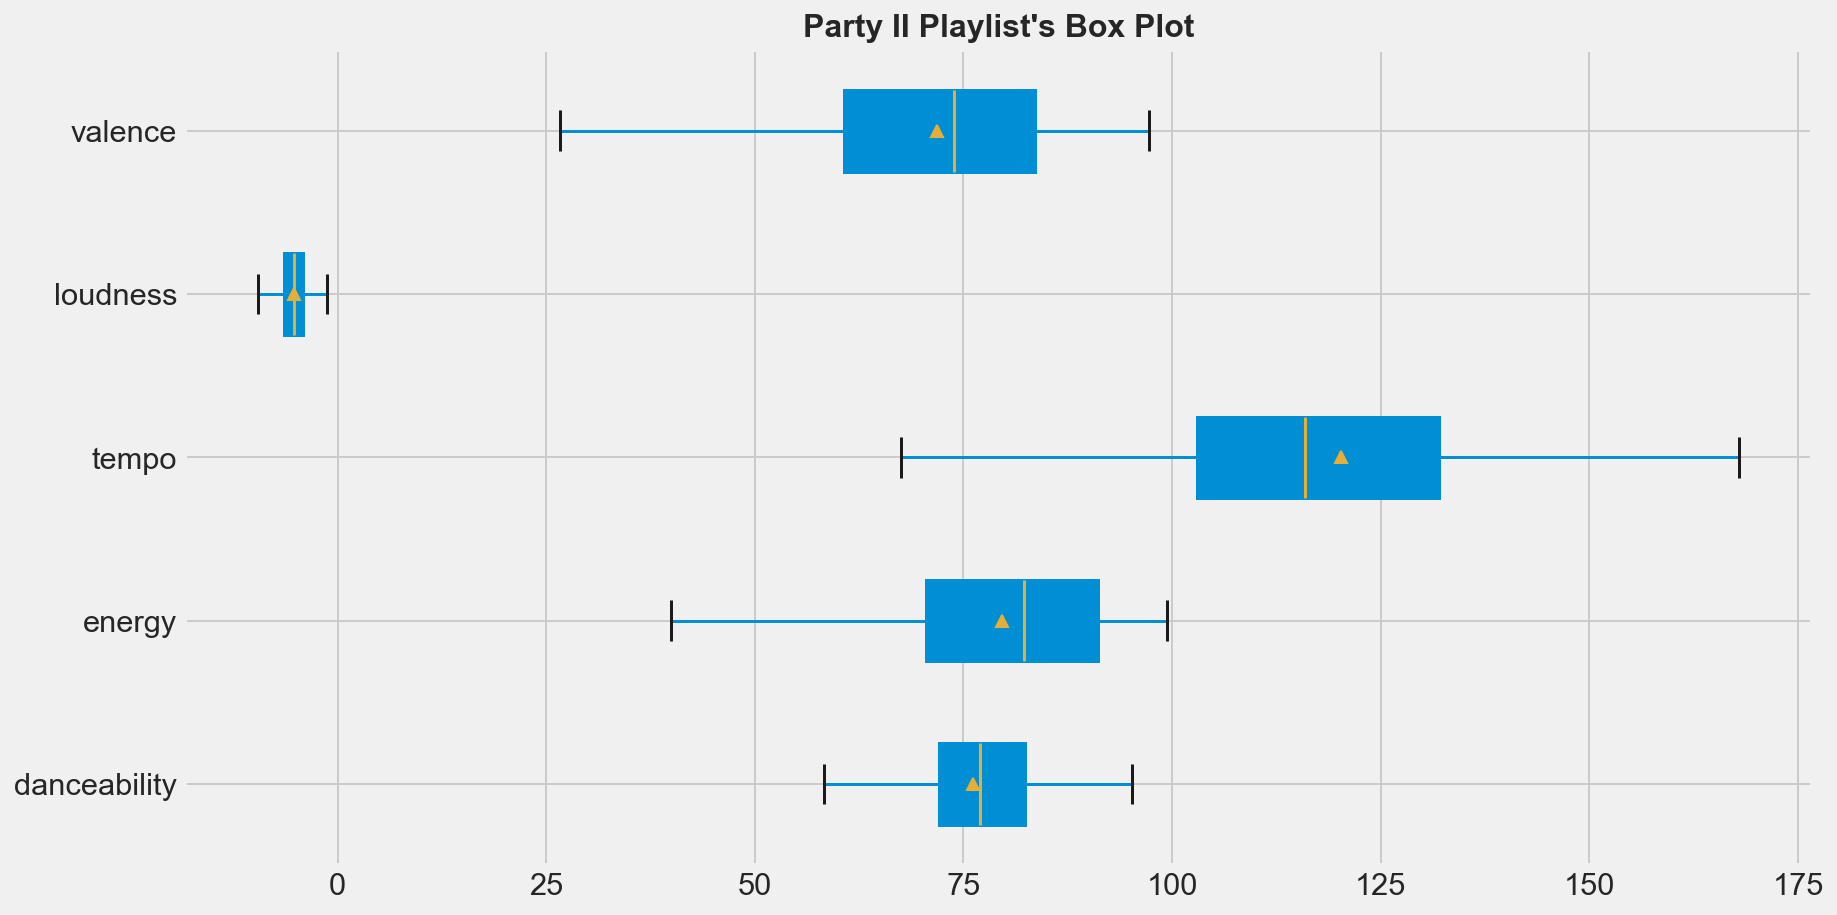

In [48]:
df_party_exp_II.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Party II Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

Approach III

In [49]:
df_party['score'] = df_party['danceability'] * 30 + df_party['energy'] * 20 + df_party['tempo'] * 20 + df_party['loudness'] * 10 + df_party['valence'] * 20
df_party.describe()

,danceability,energy,tempo,loudness,valence,score
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,74.889362,85.021277,116.570968,-4.944213,72.219149,7673.466596
std,9.487076,9.803443,21.016205,2.108380,16.414767,701.056772
min,47.700000,57.900000,67.508000,-14.913000,26.600000,5784.680000
25%,70.050000,78.125000,103.274250,-5.806750,63.125000,7257.470000
50%,75.950000,87.950000,110.993500,-4.819500,74.550000,7650.380000
75%,81.800000,92.500000,130.788000,-3.758250,86.075000,8245.577500
max,95.200000,99.400000,187.576000,-0.155000,97.200000,9298.660000


In [50]:
df_party_exp_I['score'] = df_party_exp_I['danceability'] * 30 + df_party_exp_I['energy'] * 20 + df_party_exp_I['tempo'] * 20 + df_party_exp_I['loudness'] * 10 + df_party_exp_I['valence'] * 20
df_party_exp_I.describe()

,danceability,energy,tempo,loudness,valence,score
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,73.909701,78.835821,117.883261,-5.345687,65.392537,7406.066567
std,10.571915,15.036124,23.331403,2.158365,20.696248,937.542075
min,37.600000,36.500000,67.508000,-14.913000,12.900000,3732.130000
25%,69.050000,70.000000,103.274250,-6.538000,50.375000,6876.625000
50%,75.450000,82.200000,113.036500,-5.119500,68.500000,7510.610000
75%,81.775000,91.125000,131.986750,-4.119250,80.400000,8106.515000
max,95.200000,99.400000,199.827000,-0.155000,97.200000,9298.660000


In [51]:
df_party_exp_II['score'] = df_party_exp_II['danceability'] * 30 + df_party_exp_II['energy'] * 20 + df_party_exp_II['tempo'] * 20 + df_party_exp_II['loudness'] * 10 + df_party_exp_II['valence'] * 20
df_party_exp_II.describe()

,danceability,energy,tempo,loudness,valence,score
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,76.096923,79.590769,120.202154,-5.293808,71.799231,7661.812692
std,8.784455,13.739805,24.311423,2.068261,15.294390,685.244570
min,47.700000,27.800000,67.508000,-14.913000,26.600000,5784.680000
25%,72.100000,70.525000,102.998250,-6.400000,60.700000,7232.210000
50%,77.000000,82.200000,115.966000,-5.221000,73.850000,7609.295000
75%,82.375000,91.125000,132.029250,-4.145250,83.550000,8245.577500
max,95.200000,99.400000,187.576000,-0.155000,97.200000,9298.660000


In [52]:
df_pop['score'] = df_pop['danceability'] * 30 + df_pop['energy'] * 20 + df_pop['tempo'] * 20 + df_pop['loudness'] * 10 + df_pop['valence'] * 20
df_pop.describe()

,danceability,energy,tempo,loudness,valence,score
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,69.746535,64.533663,121.015535,-6.436386,51.571980,6770.455743
std,12.555227,17.013937,28.880686,2.325466,21.038965,1091.825378
min,37.600000,14.600000,73.537000,-15.383000,5.170000,3019.410000
25%,60.500000,55.600000,99.987000,-7.454000,35.900000,6055.490000
50%,71.000000,66.600000,116.735000,-6.283000,50.800000,6855.740000
75%,78.900000,76.400000,140.005000,-5.173000,67.700000,7507.670000
max,90.400000,99.600000,199.827000,-0.578000,96.200000,8839.300000


In [53]:
df_pop_sample_III = df_pop[df_pop['score'] > df_party['score'].mean()].copy()

In [54]:
df_party_exp_III = pd.concat([df_party, df_pop_sample_III])
display(df_party.describe())
df_party_exp_III.describe()

,danceability,energy,tempo,loudness,valence,score
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,74.889362,85.021277,116.570968,-4.944213,72.219149,7673.466596
std,9.487076,9.803443,21.016205,2.108380,16.414767,701.056772
min,47.700000,57.900000,67.508000,-14.913000,26.600000,5784.680000
25%,70.050000,78.125000,103.274250,-5.806750,63.125000,7257.470000
50%,75.950000,87.950000,110.993500,-4.819500,74.550000,7650.380000
75%,81.800000,92.500000,130.788000,-3.758250,86.075000,8245.577500
max,95.200000,99.400000,187.576000,-0.155000,97.200000,9298.660000


,danceability,energy,tempo,loudness,valence,score
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,74.730702,82.647368,123.829632,-5.096956,72.554386,7771.579211
std,9.479527,11.438672,26.301698,2.021306,15.613978,681.388267
min,47.700000,48.300000,67.508000,-14.913000,26.600000,5784.680000
25%,70.050000,74.925000,104.037500,-6.252750,64.275000,7363.852500
50%,75.650000,86.100000,119.982500,-5.036000,74.500000,7827.835000
75%,81.325000,91.850000,137.499750,-3.919500,84.925000,8335.120000
max,95.200000,99.400000,199.827000,-0.155000,97.200000,9298.660000


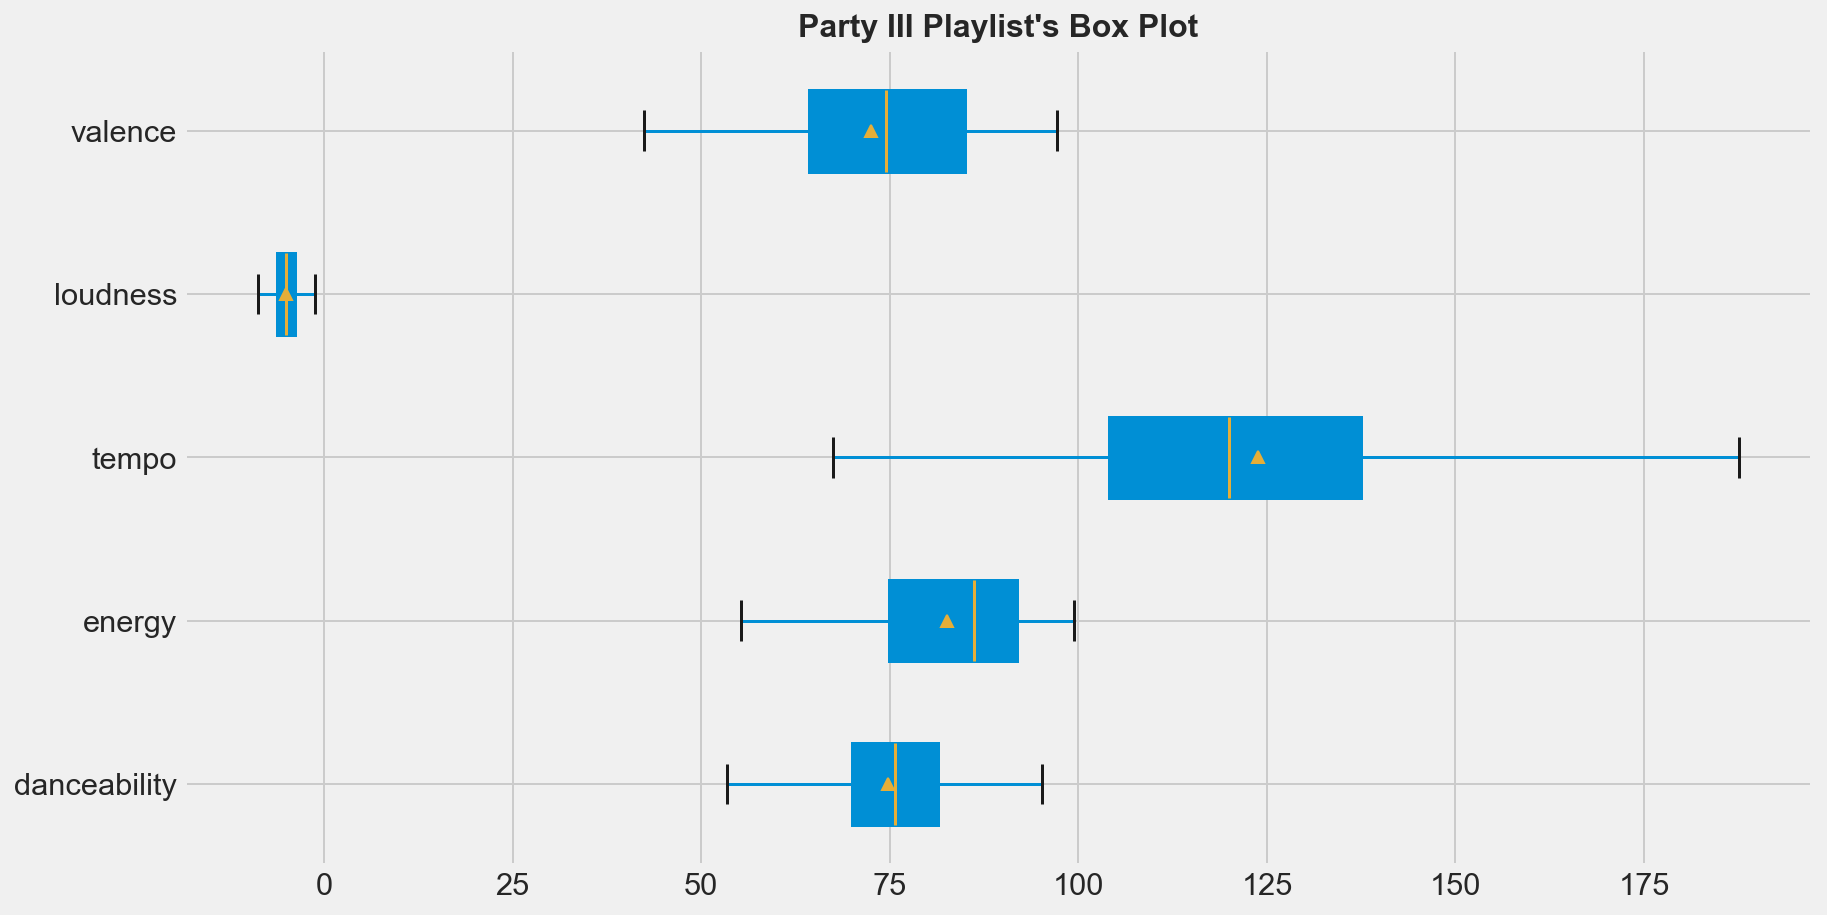

In [55]:
df_party_exp_III.iloc[:, :-1].boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Party III Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

In [56]:
display(df_party.describe())
display(df_party_exp_I.describe())
display(df_party_exp_II.describe())
df_party_exp_III.describe()

,danceability,energy,tempo,loudness,valence,score
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,74.889362,85.021277,116.570968,-4.944213,72.219149,7673.466596
std,9.487076,9.803443,21.016205,2.108380,16.414767,701.056772
min,47.700000,57.900000,67.508000,-14.913000,26.600000,5784.680000
25%,70.050000,78.125000,103.274250,-5.806750,63.125000,7257.470000
50%,75.950000,87.950000,110.993500,-4.819500,74.550000,7650.380000
75%,81.800000,92.500000,130.788000,-3.758250,86.075000,8245.577500
max,95.200000,99.400000,187.576000,-0.155000,97.200000,9298.660000


,danceability,energy,tempo,loudness,valence,score
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,73.909701,78.835821,117.883261,-5.345687,65.392537,7406.066567
std,10.571915,15.036124,23.331403,2.158365,20.696248,937.542075
min,37.600000,36.500000,67.508000,-14.913000,12.900000,3732.130000
25%,69.050000,70.000000,103.274250,-6.538000,50.375000,6876.625000
50%,75.450000,82.200000,113.036500,-5.119500,68.500000,7510.610000
75%,81.775000,91.125000,131.986750,-4.119250,80.400000,8106.515000
max,95.200000,99.400000,199.827000,-0.155000,97.200000,9298.660000


,danceability,energy,tempo,loudness,valence,score
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,76.096923,79.590769,120.202154,-5.293808,71.799231,7661.812692
std,8.784455,13.739805,24.311423,2.068261,15.294390,685.244570
min,47.700000,27.800000,67.508000,-14.913000,26.600000,5784.680000
25%,72.100000,70.525000,102.998250,-6.400000,60.700000,7232.210000
50%,77.000000,82.200000,115.966000,-5.221000,73.850000,7609.295000
75%,82.375000,91.125000,132.029250,-4.145250,83.550000,8245.577500
max,95.200000,99.400000,187.576000,-0.155000,97.200000,9298.660000


,danceability,energy,tempo,loudness,valence,score
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,74.730702,82.647368,123.829632,-5.096956,72.554386,7771.579211
std,9.479527,11.438672,26.301698,2.021306,15.613978,681.388267
min,47.700000,48.300000,67.508000,-14.913000,26.600000,5784.680000
25%,70.050000,74.925000,104.037500,-6.252750,64.275000,7363.852500
50%,75.650000,86.100000,119.982500,-5.036000,74.500000,7827.835000
75%,81.325000,91.850000,137.499750,-3.919500,84.925000,8335.120000
max,95.200000,99.400000,199.827000,-0.155000,97.200000,9298.660000


In [57]:
display(df_party.shape[0])
display(df_party_exp_I.shape[0])
display(df_party_exp_II.shape[0])
df_party_exp_III.shape[0]

94

134

130

114

Text(0.5, 1.0, "KDE Plots of Playlists' Versions")

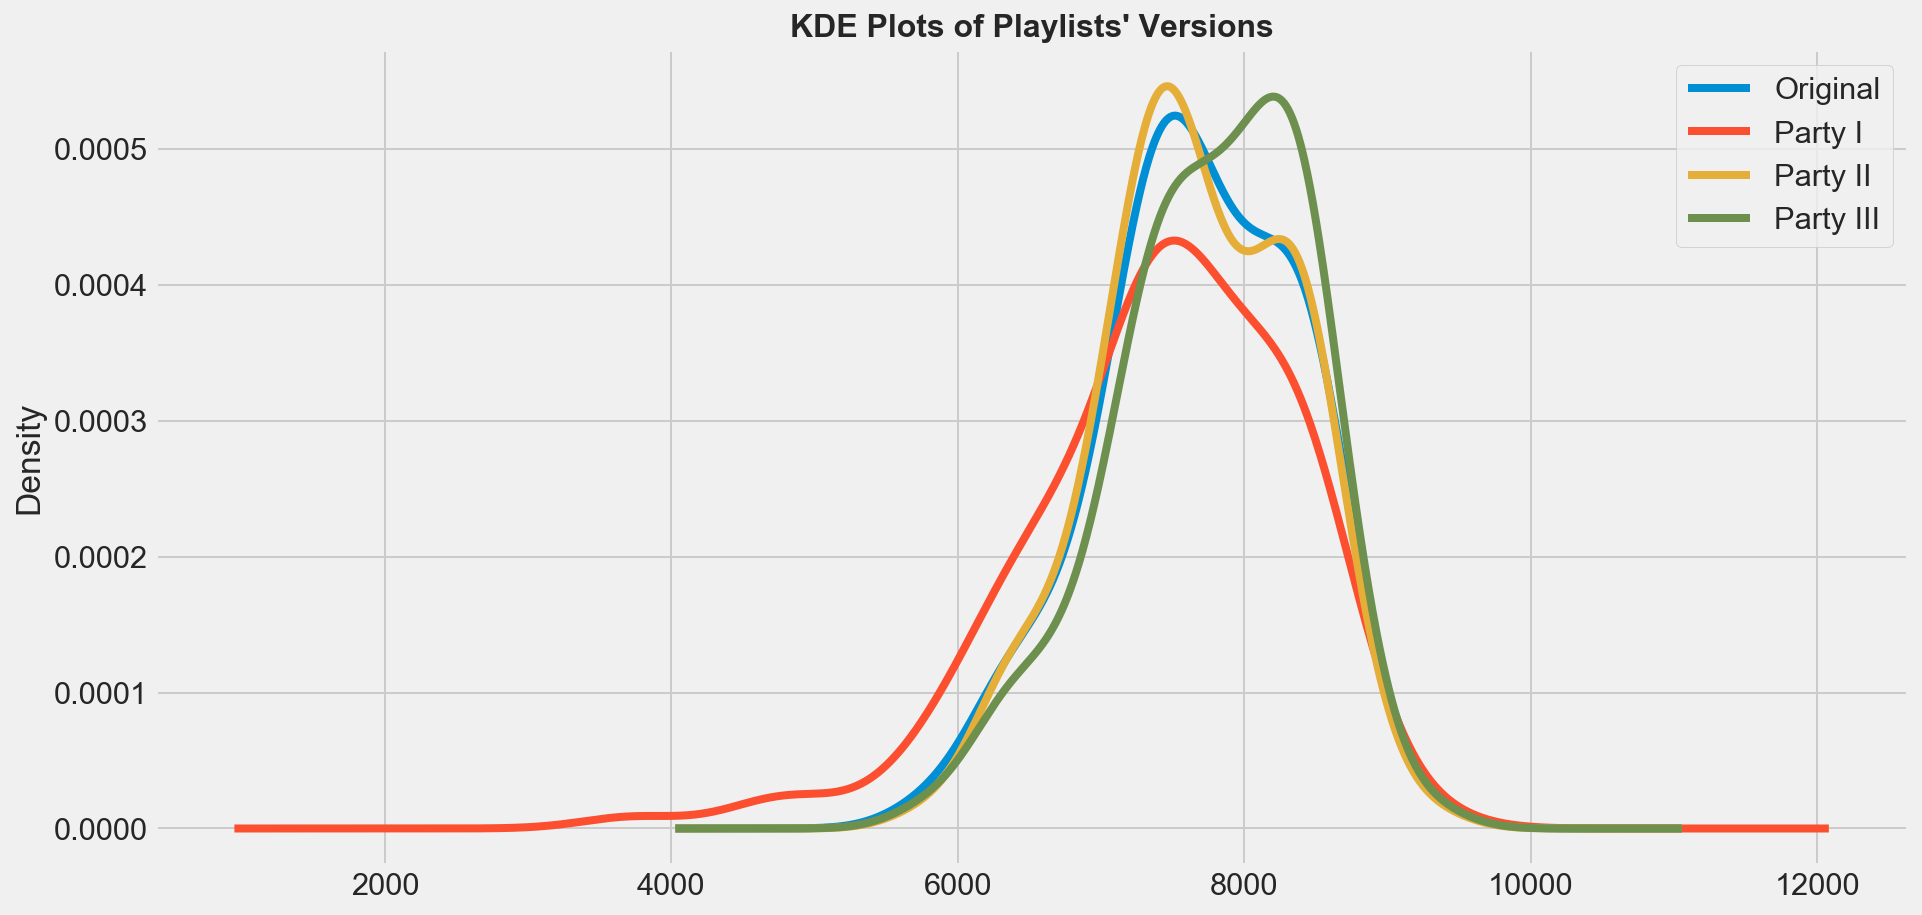

In [58]:
df_party['score'].plot.kde(figsize = (14, 7), label = 'Original', legend = True)
df_party_exp_I['score'].plot.kde(figsize = (14, 7), label = 'Party I', legend = True)
df_party_exp_II['score'].plot.kde(figsize = (14, 7), label = 'Party II', legend = True)
df_party_exp_III['score'].plot.kde(figsize = (14, 7), label = 'Party III', legend = True)

plt.title("KDE Plots of Playlists\' Versions", fontsize=16, fontweight='heavy')

Create the New Playlist

In [70]:
# Authorization flow

scope = "playlist-modify-public"
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [71]:
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [72]:
create_playlist(sp, username, 'Blackrock Party', 'A pure party playlist created by Blackrock DJs!')

In [74]:
# Find the new playlist's id
fetch_playlists(sp,username)

,id,name,#tracks
0,7yWnKUHpswBrpSGb94iw3y,Blackrock Party,0
1,4sBfJCjimJkvq19uBoFypc,Blackrock Party,0
2,4qmWD04QjpU27lB4b0pb3Q,DJ,94
3,7syrim9K1FCfT1EZWfMUxp,Bollywood Remix,122


In [75]:
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 100])
        index += 100

In [76]:
list_track = df_party_exp_III.index

In [77]:
enrich_playlist(sp, username, '4sBfJCjimJkvq19uBoFypc', list_track)

In [78]:
df5 = fetch_audio_features(sp, username, '4sBfJCjimJkvq19uBoFypc')
df5.head(30)

,track_name,danceability,energy,tempo,loudness,valence
track_id,,,,,,
2Ggpu9s4UP2fO7bjgBMiss,Dhinka Chika,75.2,97.8,82.988,-4.786,80.4
2zZTXtLqCsICzEcztKjn47,"Tum Hi Ho Bandhu (From ""Cocktail"")",71.4,89.2,134.997,-5.342,89.9
1vSXwYeKnzsVvekSpqVabx,Chikni Chameli,69.3,95.6,90.005,-5.012,66.5
3fPgIknlkDWXs1l2noKZbp,Kar Gayi Chull,82.7,73.7,121.990,-5.473,87.3
790uNrqzKWCvj8rR1QXNpU,"Aankh Marey (From ""Simmba"")",79.6,97.8,129.999,-1.266,80.0
5cjVsWqIkBQC7acTRhL0RO,Kamariya,82.5,66.6,96.987,-4.847,76.3
2mwBSO58y92EYmEFpDfmS7,Suit Suit,76.7,86.9,98.208,-3.381,75.1
0LZA36VEmc6n0Y7X29zIgE,Jaani Tera Naa,77.6,88.2,93.990,-2.864,78.9
6cARnc9YVlBNigjNSX63pp,"Dilbar (From ""Satyameva Jayate"")",72.5,91.2,104.054,-3.665,67.4


In [68]:
list_track

Index(['2Ggpu9s4UP2fO7bjgBMiss', '2zZTXtLqCsICzEcztKjn47',
       '1vSXwYeKnzsVvekSpqVabx', '3fPgIknlkDWXs1l2noKZbp',
       '790uNrqzKWCvj8rR1QXNpU', '5cjVsWqIkBQC7acTRhL0RO',
       '2mwBSO58y92EYmEFpDfmS7', '0LZA36VEmc6n0Y7X29zIgE',
       '6cARnc9YVlBNigjNSX63pp', '7s0qlp1ibUxVXLsOM0YWia',
       ...
       '71N1RkTD8UCy4lhInKD88e', '71N1RkTD8UCy4lhInKD88e',
       '3dQS1BsDfE1t0Qs5C7kcx8', '6fU55C7VdMSSkJ0ZGmX2Kg',
       '7ogUjvPCeIKQF70X4Phyob', '28ZnCkbjIVfigYP24BP8W6',
       '5wn706tAeb60aSezfMr1Nk', '3Z3cDIMrnPhIv0iCuhOqhY',
       '2LE1Mp6l1GjTIJoj9dOHi3', '4XwNY27VxKV9PM2GqkN2Gt'],
      dtype='object', name='track_id', length=114)